<a href="https://colab.research.google.com/github/AnjuAlex66/Satellite-Image-Classification-for-Land-Cover-Mapping/blob/main/CNN_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Satellite Image Classification for Land Cover Mapping**

The main objective of this project is to classify the types of land from the their images obtained via satellite. We will build a simple deep learing image classification model using convolutional neural network and evaluate the performance of it.The dataset contain 10 distinct types of land area such as annual crop,forest,highway,river etc.

In [ ]:
!kaggle datasets download -d nilesh789/eurosat-rgb

In [ ]:
!unzip /content/eurosat-rgb.zip

In [ ]:
!cp -r /content/2750  /content/drive/MyDrive/CNN_project

In [ ]:
import os
import cv2

In [ ]:
sub_dirs=os.listdir('/content/drive/MyDrive/CNN_project/2750')
sub_dirs

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [ ]:
main_path='/content/drive/MyDrive/CNN_project/2750'
sub_dirs=os.listdir(main_path)
x=[]
y=[]
for sub_dir in sub_dirs:
  subpath=os.path.join(main_path,sub_dir)
  img_names=os.listdir(subpath)
  for img in img_names:
    img_path=os.path.join(subpath,img)
    img_array=cv2.imread(img_path,1)
    # print(img_array.shape)
    # break
    img_resized=cv2.resize(img_array,(64,64))
    img_final=img_resized.reshape(64,64,3)
    x.append(img_final)
    y.append(sub_dir)

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
def display_random_images(x, y, num_images=10):
    plt.figure(figsize=(16, 16))
    for i in range(num_images):
        idx = random.randint(0, len(x) - 1)
        img = x[idx]
        lbl = y[idx]
        ax = plt.subplot(5, 2, i + 1)
        ax.imshow(img)
        ax.set_title(lbl)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

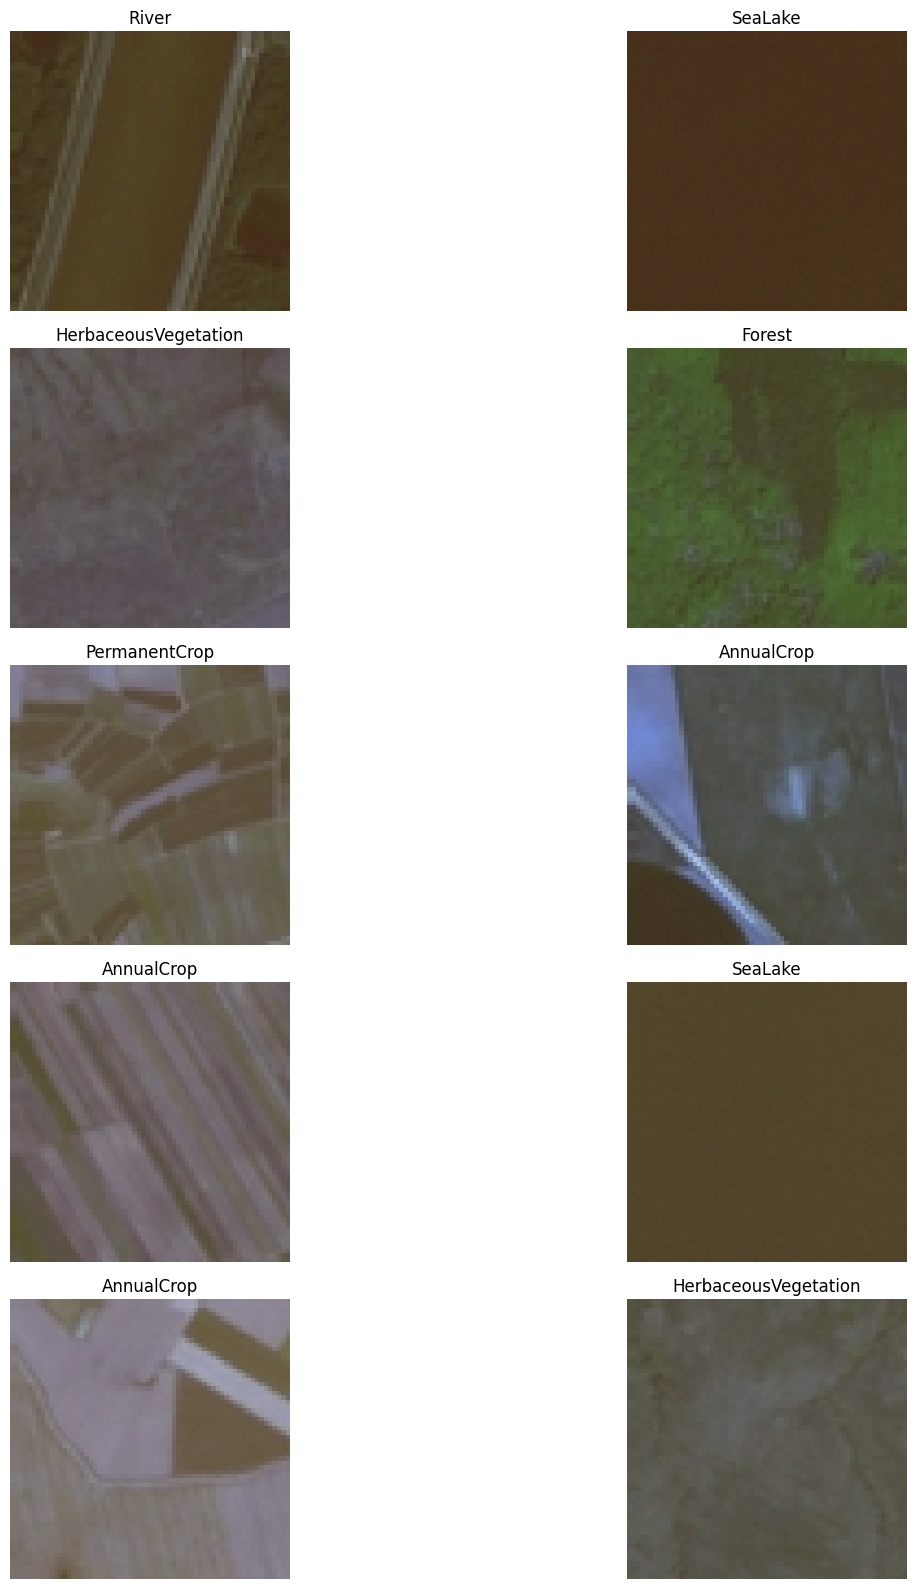

In [ ]:
display_random_images(x, y)

In [ ]:
len(y)

27000

In [ ]:
import numpy as np
x_final=np.array(x)/255

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_final=le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.3,random_state=42)

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

Defining a CNN model with 3 Convolutional layers, 1 Flatten layer and 3 Dense layers

In [ ]:
model=Sequential([Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'),
                  MaxPool2D(2,2),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPool2D(2,2),

                  Conv2D(128,(3,3),activation='relu'),
                  MaxPool2D(2,2),
                  Flatten(),
                  Dense(32,activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_accuracy=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
591/591 [==============================] - 12s 11ms/step - loss: 1.4737 - accuracy: 0.4247 - val_loss: 1.0929 - val_accuracy: 0.6102
Epoch 2/50
591/591 [==============================] - 5s 9ms/step - loss: 0.9271 - accuracy: 0.6608 - val_loss: 0.9210 - val_accuracy: 0.6626
Epoch 3/50
591/591 [==============================] - 4s 7ms/step - loss: 0.7791 - accuracy: 0.7140 - val_loss: 0.6670 - val_accuracy: 0.7601
Epoch 4/50
591/591 [==============================] - 4s 7ms/step - loss: 0.6663 - accuracy: 0.7558 - val_loss: 0.6637 - val_accuracy: 0.7652
Epoch 5/50
591/591 [==============================] - 5s 9ms/step - loss: 0.6193 - accuracy: 0.7752 - val_loss: 0.6149 - val_accuracy: 0.7778
Epoch 6/50
591/591 [==============================] - 5s 8ms/step - loss: 0.5658 - accuracy: 0.7957 - val_loss: 0.5637 - val_accuracy: 0.7975
Epoch 7/50
591/591 [==============================] - 4s 7ms/step - loss: 0.5221 - accuracy: 0.8126 - val_loss: 0.6044 - val_accuracy: 0.7898
Epoc

In [ ]:
model.evaluate(x_test,y_test)

254/254 [==============================] - 1s 3ms/step - loss: 1.0139 - accuracy: 0.8485


[1.0139373540878296, 0.8485184907913208]

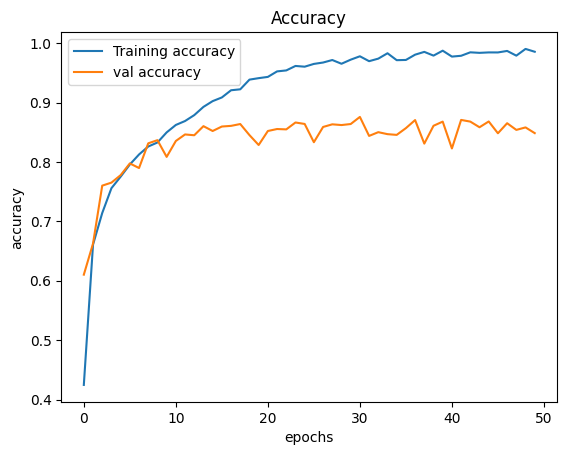

In [ ]:
#plotting graphs for accuracy
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(model_accuracy.history['accuracy'],label='Training accuracy')
plt.plot(model_accuracy.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [ ]:
def prediction(path):
  array=cv2.imread(path,1)
  arr_resize=cv2.resize(array,(64,64))
  arr_reshape=arr_resize.reshape(1,64,64,3)
  arr_reshape=arr_reshape/255
  y_pred=model.predict(arr_reshape)
  pred_label=np.argmax(y_pred)
  pred_label=le.inverse_transform([pred_label])
  return pred_label



In [ ]:
prediction("/content/drive/MyDrive/CNN_project/2750/Forest/Forest_1000.jpg")

1/1 [==============================] - 0s 81ms/step


array(['Forest'], dtype='<U20')